# Binning, counting, fitting

When size (width) matters...

In [2]:
import numpy as np
import hist
from scipy.optimize import curve_fit
import scipy.integrate as integrate
import math
import matplotlib.pyplot as plt

Generate random gaussian invariant mass data, for `N` pairs. So the true number of pairs we'll try to find back is `N`

In [3]:
N=1000
mu=3
sigma=0.2
minv = np.random.normal(mu, sigma, N)
minv.mean(),math.sqrt(minv.var())

(2.991598167948161, 0.19895583696107913)

Prepare a gaussian function for fitting the data.

In [4]:
def fit_gaus(x,norm,mean,sigma):
    return norm*np.exp(-1*np.square((x-mean)/(2*sigma*sigma)))

Like in the real analysis, the data we fit is binned into histograms. Let's use two such histograms, with different binnings...

(2.0, 4.0)

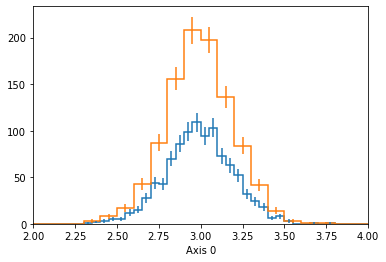

In [5]:
hminv1 = hist.Hist(hist.axis.Regular(bins=240,start=0,stop=12))
hminv2 = hist.Hist(hist.axis.Regular(bins=120,start=0,stop=12))
hminv1.fill(minv)
hminv2.fill(minv)
hminv1.plot()
hminv2.plot()
plt.xlim(2,4)

Both histograms have, by construction, the name number of entries, which is the number of pairs

In [7]:
print(f"{hminv1.counts().sum()} {hminv2.counts().sum()}")

1000.0 1000.0


Even if in this simple case (only signal), we don't strictly need to fit (we already have the number of pairs by counting the number of entries), we should be able to fit and get the same result, shouldn't we ? So let's try.

In [8]:
g1, _ = curve_fit(fit_gaus,
        xdata=hminv1.axes[0].centers,
        ydata=hminv1.values())
g2, _ = curve_fit(fit_gaus,
        xdata=hminv2.axes[0].centers,
        ydata=hminv2.values())
g1,g2

(array([103.11003403,   2.99223351,  -0.36748997]),
 array([205.84931338,   2.99066006,   0.36749737]))

Let's integrate the fitted function...

In [9]:
i1=integrate.quad(lambda x: fit_gaus(x,*g1),0,12)
i2=integrate.quad(lambda x: fit_gaus(x,*g2),0,12)
print(i1[0],i2[0])

49.362465418736946 98.55140740963284


Hum... Not quite the number of pairs... But if we take the binning into account, we'll get back our right number of pairs : 

In [10]:
print(i1[0]/hminv1.axes[0].widths[0],i2[0]/hminv2.axes[0].widths[0])

987.2493083747389 985.5140740963284
